In [1]:
import os
import pandas as pd
import csv
import geojson
import numpy as np
from keras.models import load_model
from sklearn.preprocessing import StandardScaler

In [2]:
co_model = load_model('MachineLearning/Models/co_model.h5')
dewp_model = load_model('MachineLearning/Models/dewp_model.h5')
no2_model = load_model('MachineLearning/Models/no2_model.h5')
o3_model = load_model('MachineLearning/Models/o3_model.h5')
pm10_model = load_model('MachineLearning/Models/pm10_model.h5')
pres_model = load_model('MachineLearning/Models/pres_model.h5')
rain_model = load_model('MachineLearning/Models/rain_model.h5')
so2_model = load_model('MachineLearning/Models/so2_model.h5')
temp_model = load_model('MachineLearning/Models/temp_model.h5')

path = os.path.join(os.getcwd(), 'MachineLearning', 'Resources', 'all_city_data.csv')
df = pd.read_csv(path)
df = df.drop(columns = {"Unnamed: 0"})
features = ["PM10", "SO2", "NO2", "CO", "O3", "TEMP", "PRES", "DEWP", "RAIN"]
scalar = StandardScaler()
# the fit_transform ops returns a 2d numpy.array, we cast it to a pd.DataFrame
standardized_features = pd.DataFrame(scalar.fit_transform(df[features].copy()), columns = features)
old_shape = df.shape
# drop the unnormalized features from the dataframe
df.drop(features, axis = 1, inplace = True)
# join back the normalized features
df = pd.concat([df, standardized_features], axis= 1)
assert old_shape == df.shape, "something went wrong!"
grouped_df=df.groupby('dt').mean().reset_index()

In [3]:
grouped_df.head()

,dt,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN
0,2013-01-03 00:00:00,5.800000,-1.080358,-0.444993,-1.086331,-0.842661,0.269844,-1.325402,1.238340,-1.703139,-0.080522
1,2013-01-03 01:00:00,7.222222,-1.047856,-0.450193,-1.071621,-0.825829,0.245656,-1.337020,1.308589,-1.703547,-0.080522
2,2013-01-03 02:00:00,4.500000,-1.105939,-0.343597,-1.113193,-0.830779,0.304674,-1.403971,1.261254,-1.765618,-0.080522
3,2013-01-03 03:00:00,4.600000,-1.097041,-0.360757,-1.051794,-0.815927,0.289000,-1.410469,1.384539,-1.830302,-0.080522
4,2013-01-03 04:00:00,3.800000,-1.112613,-0.313959,-1.046038,-0.798105,0.282034,-1.447685,1.456186,-1.808250,-0.080522


In [4]:
len(grouped_df['PM2.5'])

33423

In [5]:
grouped_df.isna().sum()

dt       0
PM2.5    0
PM10     0
SO2      0
NO2      0
CO       0
O3       0
TEMP     0
PRES     0
DEWP     0
RAIN     0
dtype: int64

In [7]:
days_of_data = 365

############### Get prediction for S02 ####################
predictions=[]
input_ary=np.array(grouped_df['PM10'][-365:].values)
for each_t in range(days_of_data): 
                input_ary = input_ary[-365:]
                input_ary = np.reshape(input_ary, (1, 365, 1))
                prediction = pm10_model.predict(input_ary)
                predictions.append(prediction[0][0])
                input_ary=np.append(input_ary, prediction)
pm10 = predictions
            
############### Get prediction for S02 ####################
predictions=[]
input_ary=np.array(grouped_df['SO2'][-365:].values)
for each_t in range(days_of_data): 
                input_ary = input_ary[-365:]
                input_ary = np.reshape(input_ary, (1, 365, 1))
                prediction = so2_model.predict(input_ary)
                predictions.append(prediction[0][0])
                input_ary=np.append(input_ary, prediction)
so2 = predictions
            
############### Get prediction for CO ####################
predictions=[]
input_ary=np.array(grouped_df['CO'][-365:].values)
for each_t in range(days_of_data): 
                input_ary = input_ary[-365:]
                input_ary = np.reshape(input_ary, (1, 365, 1))
                prediction = co_model.predict(input_ary)
                predictions.append(prediction[0][0])
                input_ary=np.append(input_ary, prediction)
co = predictions
            
############### Get prediction for DEWP ####################
predictions=[]
input_ary=np.array(grouped_df['DEWP'][-365:].values)
for each_t in range(days_of_data): 
                input_ary = input_ary[-365:]
                input_ary = np.reshape(input_ary, (1, 365, 1))
                prediction = dewp_model.predict(input_ary)
                predictions.append(prediction[0][0])
                input_ary=np.append(input_ary, prediction)
dewp = predictions
            
############### Get prediction for NO2 ####################
predictions=[]
input_ary=np.array(grouped_df['NO2'][-365:].values)
for each_t in range(days_of_data): 
                input_ary = input_ary[-365:]
                input_ary = np.reshape(input_ary, (1, 365, 1))
                prediction = no2_model.predict(input_ary)
                predictions.append(prediction[0][0])
                input_ary=np.append(input_ary, prediction)
no2 = predictions
            
############### Get prediction for O3 ####################
predictions=[]
input_ary=np.array(grouped_df['O3'][-365:].values)
for each_t in range(days_of_data): 
                input_ary = input_ary[-365:]
                input_ary = np.reshape(input_ary, (1, 365, 1))
                prediction = o3_model.predict(input_ary)
                predictions.append(prediction[0][0])
                input_ary=np.append(input_ary, prediction)
o3 = predictions
            
############### Get prediction for PRES ####################
predictions=[]
input_ary=np.array(grouped_df['PRES'][-365:].values)
for each_t in range(days_of_data): 
                input_ary = input_ary[-365:]
                input_ary = np.reshape(input_ary, (1, 365, 1))
                prediction = pres_model.predict(input_ary)
                predictions.append(prediction[0][0])
                input_ary=np.append(input_ary, prediction)
pres = predictions
            
############### Get prediction for RAIN ####################
predictions=[]
input_ary=np.array(grouped_df['RAIN'][-365:].values)
for each_t in range(days_of_data): 
                input_ary = input_ary[-365:]
                input_ary = np.reshape(input_ary, (1, 365, 1))
                prediction = rain_model.predict(input_ary)
                predictions.append(prediction[0][0])
                input_ary=np.append(input_ary, prediction)
rain = predictions
            
############### Get prediction for TEMP ####################
predictions=[]
input_ary=np.array(grouped_df['TEMP'][-365:].values)
for each_t in range(days_of_data): 
                input_ary = input_ary[-365:]
                input_ary = np.reshape(input_ary, (1, 365, 1))
                prediction = temp_model.predict(input_ary)
                predictions.append(prediction[0][0])
                input_ary=np.append(input_ary, prediction)
temp = predictions
variable_array = [pm10, so2, no2, co, o3, temp, pres, dewp, rain]

In [8]:
len(input_ary[-365:])

365

In [10]:
import matplotlib.pyplot as plt

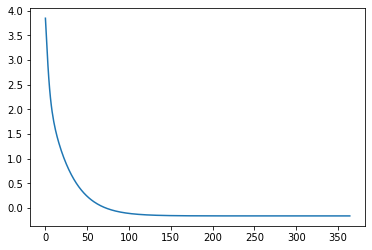

In [11]:
plt.plot(pm10)

In [12]:
type(input_ary)

numpy.ndarray

In [13]:
len(variable_array[8])

365

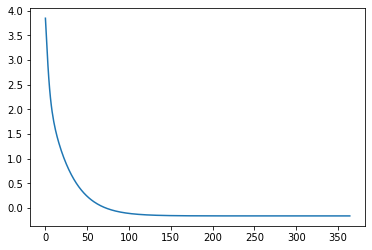

In [14]:
plt.plot(variable_array[0])

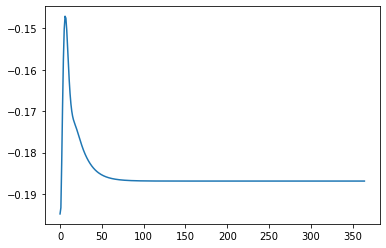

In [15]:
plt.plot(variable_array[1])

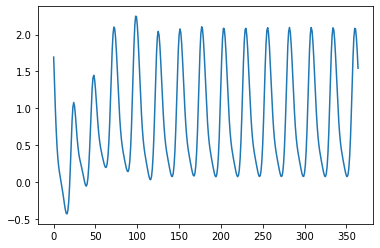

In [16]:
plt.plot(variable_array[2])

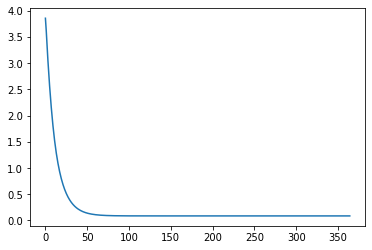

In [17]:
plt.plot(variable_array[3])

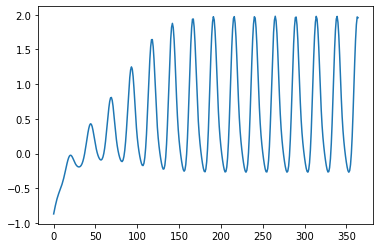

In [18]:
plt.plot(variable_array[4])

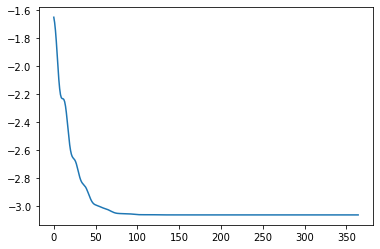

In [19]:
plt.plot(variable_array[5])

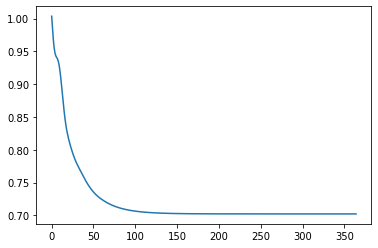

In [20]:
plt.plot(variable_array[6])

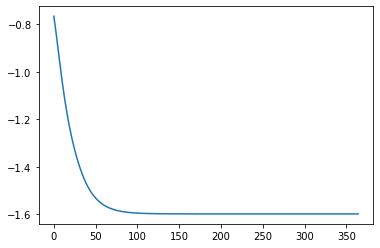

In [21]:
plt.plot(variable_array[7])

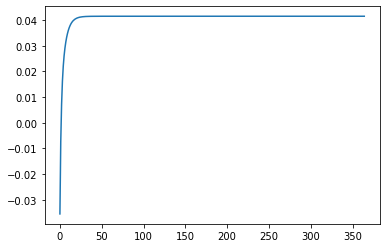

In [22]:
plt.plot(variable_array[8])

In [23]:
prediction_df = pd.DataFrame(variable_array)
prediction_df = prediction_df.transpose().rename(columns = {0 : 'pm10',1 : 'so2',2 : 'no2',3 : 'co',4 : 'o3',5 : 'temp',6 : 'pres',7 : 'dewp',8 : 'rain'})

In [24]:
prediction_df.head()

,pm10,so2,no2,co,o3,temp,pres,dewp,rain
0,3.846726,-0.194838,1.694294,3.854936,-0.867843,-1.649350,1.003512,-0.766947,-0.035515
1,3.523634,-0.193370,1.338064,3.613438,-0.807987,-1.687361,0.984358,-0.790868,-0.007338
2,3.194004,-0.182367,0.997979,3.321627,-0.750000,-1.744635,0.967527,-0.816832,0.007207
3,2.894105,-0.168977,0.709836,3.047082,-0.697423,-1.821908,0.955056,-0.844182,0.016238
4,2.635233,-0.157559,0.486848,2.795775,-0.651016,-1.913105,0.947220,-0.872396,0.022092


In [25]:
pm25_model = load_model('MachineLearning/Models/pm25_model.h5')

In [26]:
pm25_model.predict([[ 1.109255, 1.933092, -1.025820, 1.451466, -0.709386, 0.826961, 0.994897, -0.006684, -1.312745]])

array([[130.42278]], dtype=float32)

In [27]:
pm25_predictions = []
for index, row in prediction_df.iterrows():
    array_of_vals = [row[0].item(), row[1].item(), row[2].item(), row[3].item(), row[4].item(), row[5].item(), row[6].item(), row[7].item(), row[8].item()]
    pm25_prediction = pm25_model.predict([array_of_vals])
    pm25_predictions.append(pm25_prediction[0][0])

In [28]:
path = os.path.join(os.getcwd(), 'MachineLearning','Resources', 'all_city_data.csv')
df = pd.read_csv(path)
df.head()

,Unnamed: 0,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,dt
0,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,2013-01-03 00:00:00
1,0,9.0,9.0,3.0,17.0,300.0,89.0,-0.5,1024.5,-21.4,0.0,2013-01-03 00:00:00
2,0,4.0,4.0,14.0,20.0,300.0,69.0,-0.7,1023.0,-18.8,0.0,2013-01-03 00:00:00
3,0,7.0,7.0,3.0,2.0,100.0,91.0,-2.3,1020.3,-20.7,0.0,2013-01-03 00:00:00
4,0,5.0,14.0,4.0,12.0,200.0,85.0,-0.5,1024.5,-21.4,0.0,2013-01-03 00:00:00


In [29]:
# df = df[df['dt'] <= '2017-01-01']

In [30]:
df['dt'].max()

'2016-12-31 23:00:00'

In [31]:
df['dt']=pd.to_datetime(df['dt'])

In [32]:
from datetime import timedelta

In [33]:
last_date = df['dt'].max()
last_date = last_date - timedelta(hours= 23)
last_date

Timestamp('2016-12-31 00:00:00')

In [34]:
i = len(pm25_predictions) 
j = 0
time_array = []
while j < i:
    the_day = last_date + timedelta(days= j+1)
    time_array.append(the_day)
    j = j + 1

In [35]:
len(time_array)

365

In [36]:
final_predictions_df = pd.DataFrame({'dt': time_array, 'pm2.5': pm25_predictions})

In [37]:
final_predictions_df.head()

,dt,pm2.5
0,2017-01-01,417.673950
1,2017-01-02,395.337555
2,2017-01-03,373.784058
3,2017-01-04,355.613739
4,2017-01-05,341.273865


In [52]:
final_predictions_df.to_csv("Resources/predictions.csv")

In [40]:
days_2015_16 = df[df['dt'] >= '2015-01-01']
days_2015 = days_2015_16[days_2015_16['dt'] <= '2016-01-01']

In [41]:
df_2015 = days_2015[['dt', 'PM2.5']].reset_index(drop = True)

In [44]:
df_2015.head()

,dt,PM2.5
0,2015-01-01,7.0
1,2015-01-01,3.0
2,2015-01-01,3.0
3,2015-01-01,12.0
4,2015-01-01,12.0


In [47]:
df_2015 = df_2015.groupby(pd.Grouper(key='dt', axis=0, freq='d')).mean().reset_index()

In [48]:
df_2015.head()

,dt,PM2.5
0,2015-01-01,36.090566
1,2015-01-02,76.649306
2,2015-01-03,42.719858
3,2015-01-04,56.959677
4,2015-01-05,121.185315


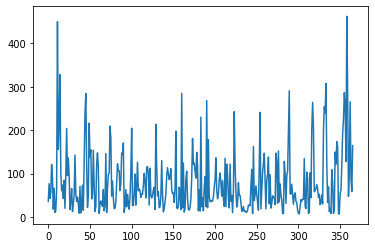

In [50]:
plt.plot(df_2015['PM2.5'])

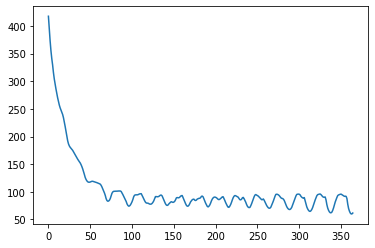

In [51]:
plt.plot(final_predictions_df['pm2.5'])